In [1]:
import tensorflow
print(tensorflow.__version__)
import numpy as np

2.2.0


In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [4]:
from IPython.display import Image  
from graphviz import Source

8


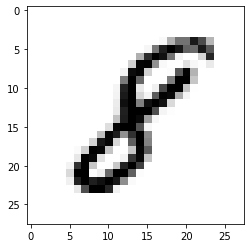

In [5]:
import matplotlib.pyplot as plt

image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [22]:
noise_factor = 0.10
x_train_noisy = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

noise_factor = 0.25
x_train_noisy_2 = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy_2 = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy_2 = np.clip(x_train_noisy_2,0.,1.)
x_test_noisy_2 = np.clip(x_test_noisy_2,0.,1.)

noise_factor = 0.35
x_train_noisy_3 = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy_3 = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy_3 = np.clip(x_train_noisy_3,0.,1.)
x_test_noisy_3 = np.clip(x_test_noisy_3,0.,1.)

noise_factor = 0.5
x_train_noisy_4 = x_train + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_train.shape)
x_test_noisy_4 = x_test + noise_factor * np.random.normal(loc =0.0,scale=1.0,size=x_test.shape)
x_train_noisy_4 = np.clip(x_train_noisy_4,0.,1.)
x_test_noisy_4 = np.clip(x_test_noisy_4,0.,1.)

In [24]:
# Importing the required Keras modules containing model and layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [25]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
loss = model.fit(x=x_train_noisy,y=y_train,epochs=10)
loss_2 = model.fit(x=x_train_noisy_2,y=y_train,epochs=10)
loss_3 = model.fit(x=x_train_noisy_3,y=y_train,epochs=10)
loss_4 = model.fit(x=x_train_noisy_4,y=y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2281 - accuracy: 0.9323
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0893 - accuracy: 0.9729
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0572 - accuracy: 0.9819
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0429 - accuracy: 0.9856
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0306 - accuracy: 0.9897
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0266 - accuracy: 0.9907
Epoch 7/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 8/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0197 - accuracy: 0.9932
Epoch 9/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0164 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 32s 17m

In [31]:
# Calculate Test loss and Test Accuracy
print('Accuracy of model with noisy factor as 0.10:', model.evaluate(x_test_noisy, y_test))
print('Accuracy of model with noisy factor as 0.25:', model.evaluate(x_test_noisy_2, y_test))
print('Accuracy of model with noisy factor as 0.35:', model.evaluate(x_test_noisy_3, y_test))
print('Accuracy of model with noisy factor as 0.50:', model.evaluate(x_test_noisy_4, y_test))

313/313 [==============================] - 2s 7ms/step - loss: 0.2248 - accuracy: 0.9788
Accuracy of model with noisy factor as 0.10: [0.2248018980026245, 0.9787999987602234]
313/313 [==============================] - 2s 7ms/step - loss: 0.2108 - accuracy: 0.9741
Accuracy of model with noisy factor as 0.25: [0.21081899106502533, 0.9740999937057495]
313/313 [==============================] - 2s 7ms/step - loss: 0.2294 - accuracy: 0.9652
Accuracy of model with noisy factor as 0.35: [0.22944732010364532, 0.9652000069618225]
313/313 [==============================] - 2s 6ms/step - loss: 0.3208 - accuracy: 0.9427
Accuracy of model with noisy factor as 0.50: [0.32079991698265076, 0.9427000284194946]


9


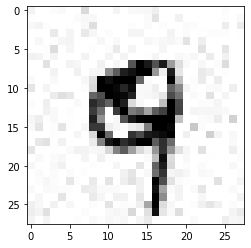

In [32]:
image_index = 4444
plt.imshow(x_test_noisy[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9


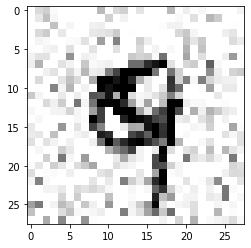

In [33]:
image_index = 4444
plt.imshow(x_test_noisy_2[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy_2[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9


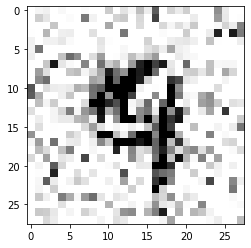

In [34]:
image_index = 4444
plt.imshow(x_test_noisy_3[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy_3[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

9


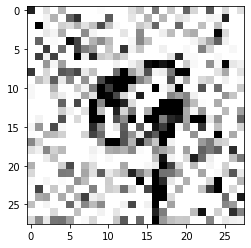

In [35]:
image_index = 4444
plt.imshow(x_test_noisy_4[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test_noisy_4[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())